# Main Analysis Plots

In [1]:
%run analyzing_class.ipynb

this file has been successfully read!


/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_67908/3201124260.py:65: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  flux_from_spectrum = integrate.quad(lambda x: K * ((x/E_0)**(- alpha - beta * np.log(x/E_0))),


In [2]:
## main imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## astro imports
import astropy.table
from astropy import units as u
from astropy.io import fits
from astropy.io import ascii
from astropy.table import QTable, Table

from astropy.time import Time,TimeUnix
from datetime import datetime

## other imports
import os
import csv
import glob
import math
import json
import statistics

import scipy.optimize as sp
import scipy.odr.odrpack as odrpack
from scipy import signal, integrate
from scipy.fft import fft, fftfreq
from scipy.stats import pearsonr

import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter

In [3]:
path_4lac_dr3_catalog = '../4LAC_catalog_generator_v3/resulting_catalogs/agn_pop_4lac_dr3.ecsv'
path_downloaded_lc_catalog = '../4LAC_lightcurve_downloader_v3/resulting_catalogs/input_lightcurve_downloads_v3'

In [4]:
## only fixed for test

path_downloaded_lc_3days = f'{path_downloaded_lc_catalog}/fixed_indexed_lightcurves/3days_ts1_fixedindex_lightcurves'
path_downloaded_lc_weekly = f'{path_downloaded_lc_catalog}/fixed_indexed_lightcurves/weekly_ts1_fixedindex_lightcurves'
path_downloaded_lc_monthly = f'{path_downloaded_lc_catalog}/fixed_indexed_lightcurves/monthly_ts1_fixedindex_lightcurves'

In [5]:
# if (bins == '3-days'):
#     file = open(f'{path_downloaded_lc_3days}/{file_name}')
# elif (bins == 'weekly'):
#     file = open(f'{path_downloaded_lc_weekly}/{file_name}')
# elif (bins == 'monthly'):
#     file = open(f'{path_downloaded_lc_monthly}/{file_name}')
# else:
#     raise ValueError("Invalid binning option. Choose from '3-days', 'weekly', or 'monthly'.")

In [6]:
## select every file that ends with .json in each folder
lc_3days_files = glob.glob(path_downloaded_lc_3days + '/*.json')
lc_weekly_files = glob.glob(path_downloaded_lc_weekly + '/*.json')
lc_monthly_files = glob.glob(path_downloaded_lc_monthly + '/*.json')

lc_3days_file_list = []
lc_weekly_file_list = []
lc_monthly_file_list = []

for file in lc_3days_files:
    stripped_file = os.path.basename(file)    # get file name
    lc_3days_file_list.append(stripped_file)  # create list
lc_3days_file_list.sort() # alphabetical order


for file in lc_weekly_files:
    stripped_file = os.path.basename(file)
    lc_weekly_file_list.append(stripped_file)  
lc_weekly_file_list.sort()


for file in lc_monthly_files:
    stripped_file = os.path.basename(file)
    lc_monthly_file_list.append(stripped_file)
lc_monthly_file_list.sort()

In [7]:
lc_3days_file_list[0]

'4FGL+J0001.2-0747.json'

In [8]:
lc_3days_file_list[0][-17:-5]

'J0001.2-0747'

In [9]:
df_agn_pop_4lac_dr3

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated
0,J0001.2+4741,0.312600,47.685902,-inf,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,0.012156,bcu,ISP,25.313953,0.675882,0.312850,1.259796e-10,2.877197e-11,1.993321e-09
1,J0001.2-0747,0.315100,-7.797100,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,0.051182,bll,LSP,46.780693,0.406565,0.111870,7.471219e-10,5.041939e-11,9.825299e-09
2,J0001.4-0010,0.371700,-0.169900,0.461516,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,0.132438,bll,LSP,9.272764,0.000000,10.000000,1.082246e-10,2.914440e-11,8.602307e-10
3,J0001.5+2113,0.381500,21.218300,1.106000,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,0.159319,fsrq,ISP,1910.935791,0.996138,0.213478,1.347354e-09,6.172809e-11,6.391699e-08
4,J0001.6-4156,0.416500,-41.942501,-inf,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,0.072754,bcu,HSP,26.393343,0.490977,0.175782,2.821817e-10,3.090882e-11,1.599132e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,359.832886,2.260300,-inf,LogParabola,5170.603516,5.111725e-15,1.757034,9.790216e-15,1.644894,0.460086,bcu,LSP,16.065315,0.311971,0.625833,1.354202e-10,3.092540e-11,1.655760e-10
3810,J2359.3-2049,359.835693,-20.818899,0.096000,PowerLaw,2594.249756,5.196033e-14,1.984188,5.197384e-14,1.982751,0.001760,bll,LSP,14.043210,0.177217,0.190973,3.462985e-10,3.494565e-11,3.021906e-09
3811,J2359.7-5041,359.936493,-50.685299,-inf,LogParabola,842.054199,1.846089e-13,2.684101,3.137423e-13,2.596392,0.731089,bcu,LSP,7.732565,0.000000,10.000000,8.286240e-11,2.406248e-11,1.205902e-09
3812,J2359.9-3736,359.981598,-37.616001,-inf,PowerLaw,1730.675415,6.743669e-14,2.120209,8.021262e-14,2.007299,0.127121,bcu,LSP,8.143241,0.000000,10.000000,1.915395e-10,2.659639e-11,2.216054e-09


In [10]:
source_name = 'J0001.2-0747'

In [11]:
df_agn_pop_4lac_dr3[df_agn_pop_4lac_dr3['Source_Name'] == source_name]

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated
1,J0001.2-0747,0.3151,-7.7971,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,0.051182,bll,LSP,46.780693,0.406565,0.11187,7.471219e-10,5.041939e-11,9.825299e-09


In [12]:
index = df_agn_pop_4lac_dr3[df_agn_pop_4lac_dr3['Source_Name'] == source_name].index

In [13]:
index

Int64Index([1], dtype='int64')

In [14]:
for i in index:
    print(df_agn_pop_4lac_dr3.loc[i,'Pivot_Energy'])

1721.6039


In [15]:
## Keep filenames that meet the criteria
filtered_3days_file_list = []

for file_name in lc_3days_file_list:
    
    analyzer = JSONAnalyzer(file_name, '3-days', 'fixed')

    source_dictionary = analyzer.data_dict
    
    if len(source_dictionary['flux_upper_limits']) <= len(source_dictionary['flux']):
        filtered_3days_file_list.append(file_name)

In [16]:
## Keep filenames that meet the criteria
filtered_weekly_file_list = []

for file_name in lc_weekly_file_list:
    
    analyzer = JSONAnalyzer(file_name, 'weekly', 'fixed')

    source_dictionary = analyzer.data_dict
    
    if len(source_dictionary['flux_upper_limits']) <= len(source_dictionary['flux']):
        filtered_weekly_file_list.append(file_name)

In [17]:
## Keep filenames that meet the criteria
filtered_monthly_file_list = []

for file_name in lc_monthly_file_list:
    
    analyzer = JSONAnalyzer(file_name, 'monthly', 'fixed')

    source_dictionary = analyzer.data_dict
    
    if len(source_dictionary['flux_upper_limits']) <= len(source_dictionary['flux']):
        filtered_monthly_file_list.append(file_name)

In [18]:
print('------- 3-days -------')
print(f'We have now {len(filtered_3days_file_list)} files instead of {len(lc_3days_file_list)}')

print('\n------- weekly -------')
print(f'We have now {len(filtered_weekly_file_list)} files instead of {len(lc_weekly_file_list)}')

print('\n------- monthly -------')
print(f'We have now {len(filtered_monthly_file_list)} files instead of {len(lc_weekly_file_list)}')

------- 3-days -------
We have now 173 files instead of 1429

------- weekly -------
We have now 339 files instead of 1429

------- monthly -------
We have now 803 files instead of 1429


In [19]:
# 4FGL+J0001.2-0747.json

# 4FGL+J1858.3-2511.json


source ='4FGL+J1858.3-2511.json'

analyzer = JSONAnalyzer(source,'3-days','fixed')

dictionary = analyzer.data_dict
dataframe = analyzer.create_dataframe()

filtered_df = analyzer.removing_outliers()

sigma_nxs, unc_sigma_nxs, fvar, unc_fvar = analyzer.calculate_variability()

In [20]:
len(dictionary['values_ts'])

1877

In [21]:
len(dictionary['flux_upper_limits'])

1389

In [22]:
len(dictionary['flux'])

486

In [23]:
len(dictionary['flux']) + len(dictionary['flux_upper_limits']) == len(dictionary['values_ts'])

False

In [24]:
dataframe

,fit_convergence,time_ts,values_ts,dlogl,flux,flux_upper_limits,flux_error
time_fit_convergence,,,,,,,
239716801,0,239716801.0,0.07,1.580000e-01,NaN,9.030000e-08,NaN
239976001,0,239976001.0,0.54,6.600000e-05,NaN,9.910000e-08,NaN
240235201,0,240235201.0,0.00,8.960000e-01,NaN,9.730000e-08,NaN
240494401,0,240494401.0,0.00,3.230000e-01,NaN,7.190000e-08,NaN
240753601,0,240753601.0,0.00,2.990000e-06,NaN,4.600000e-08,NaN
...,...,...,...,...,...,...,...
727790401,0,727790401.0,0.10,6.610000e-03,NaN,8.170000e-08,NaN
728049601,0,728049601.0,0.00,-4.400000e-10,NaN,6.850000e-08,NaN
728308801,0,728308801.0,0.00,-2.660000e-10,NaN,6.370000e-08,NaN


In [25]:
filtered_df

,fit_convergence,time_ts,values_ts,dlogl,flux,flux_upper_limits,flux_error
time_fit_convergence,,,,,,,
239716801,0,239716801.0,0.07,1.580000e-01,NaN,NaN,NaN
239976001,0,239976001.0,0.54,6.600000e-05,NaN,NaN,NaN
240235201,0,240235201.0,0.00,8.960000e-01,NaN,NaN,NaN
240494401,0,240494401.0,0.00,3.230000e-01,NaN,NaN,NaN
240753601,0,240753601.0,0.00,2.990000e-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...
727790401,0,727790401.0,0.10,6.610000e-03,NaN,NaN,NaN
728049601,0,728049601.0,0.00,-4.400000e-10,NaN,NaN,NaN
728308801,0,728308801.0,0.00,-2.660000e-10,NaN,NaN,NaN


In [26]:
# Count NaN values in a specific column in the original DataFrame
nan_count_original = dataframe['flux'].isna().sum()

# Count NaN values in a specific column in the final DataFrame
nan_count_final = filtered_df['flux'].isna().sum()

print("NaN count in specific column in the original DataFrame:", nan_count_original)
print("NaN count in specific column in the final DataFrame:", nan_count_final)

NaN count in specific column in the original DataFrame: 1391
NaN count in specific column in the final DataFrame: 1832


In [27]:
# dictionary

In [28]:
## select only non-NaN values from the DataFrame
non_nan_values = filtered_df.dropna(subset=['flux'])

# ## get the indexes of the non-NaN values
# non_nan_indexes = non_nan_values.index

## access the flux values and their corresponding indexes
selected_flux_values = non_nan_values['flux'].values

selected_ts_values = non_nan_values['values_ts'].values

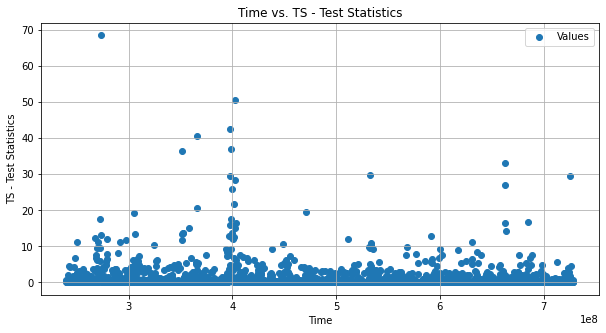

In [29]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.scatter(filtered_df['time_ts'], filtered_df['values_ts'], label='Values')
plt.xlabel('Time')
plt.ylabel('TS - Test Statistics')
plt.title('Time vs. TS - Test Statistics')
plt.grid(True)
plt.legend()

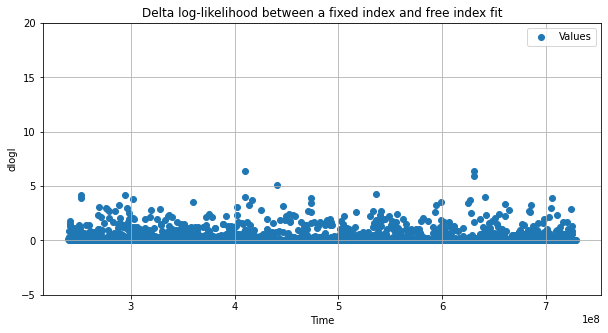

In [30]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.scatter(filtered_df['time_ts'], filtered_df['dlogl'], label='Values')
plt.xlabel('Time')
plt.ylabel('dlogl')
plt.ylim(-5,20)
plt.title('Delta log-likelihood between a fixed index and free index fit')
plt.grid(True)
plt.legend()

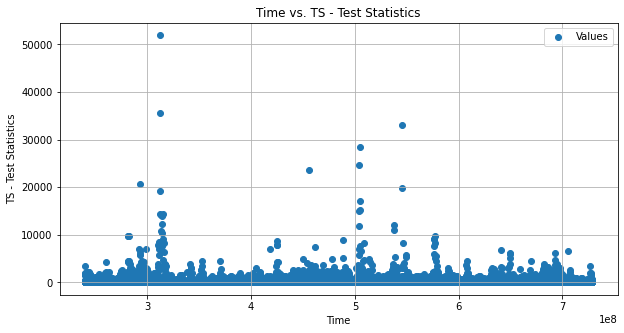

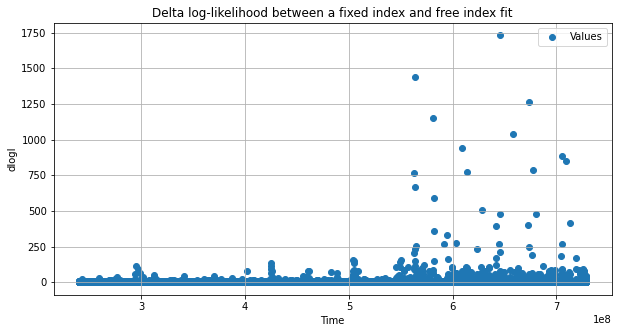

In [31]:
time_all = []
ts_all = []
dlogl_all = []


for file_name in filtered_3days_file_list:
    
    analyzer = JSONAnalyzer(file_name,'3-days','fixed')

    source_dictionary = analyzer.data_dict
    source_df = analyzer.create_dataframe()

    filtered_df = analyzer.removing_outliers()

    time_all.extend(filtered_df['time_ts'])
    ts_all.extend(filtered_df['values_ts'])
    dlogl_all.extend(filtered_df['dlogl'])

    
# Plotting the data
plt.figure(figsize=(10, 5))
plt.scatter(time_all, ts_all, label='Values')
plt.xlabel('Time')
plt.ylabel('TS - Test Statistics')
plt.title('Time vs. TS - Test Statistics')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 5))
plt.scatter(time_all, dlogl_all, label='Values')
plt.xlabel('Time')
plt.ylabel('dlogl')
plt.title('Delta log-likelihood between a fixed index and free index fit')
plt.grid(True)
plt.legend()

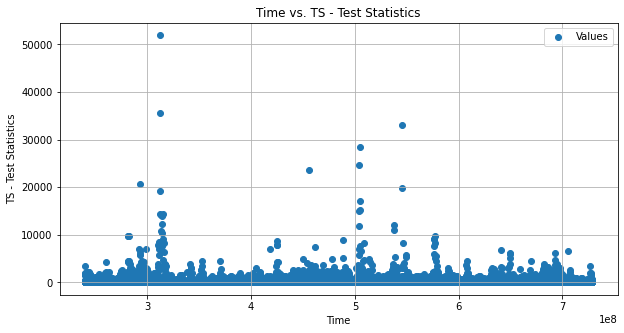

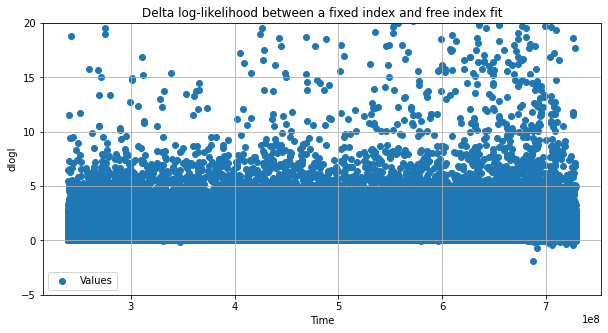

In [32]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.scatter(time_all, ts_all, label='Values')
plt.xlabel('Time')
plt.ylabel('TS - Test Statistics')
plt.title('Time vs. TS - Test Statistics')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 5))
plt.scatter(time_all, dlogl_all, label='Values')
plt.ylim(-5,20)
plt.xlabel('Time')
plt.ylabel('dlogl')
plt.title('Delta log-likelihood between a fixed index and free index fit')
plt.grid(True)
plt.legend()

## Variability

3-days:

In [33]:
df_copy_3days = df_agn_pop_4lac_dr3.copy()

In [34]:
file_names_Vaughan_3days = []
norm_excessvar_Vaughan_3days = []
unc_norm_excessvar_Vaughan_3days = []
fvar_Vaughan_3days = []
unc_fvar_Vaughan_3days = []

for file in filtered_3days_file_list:
    
    file_name = file  # .json file name
    
    analyzer = JSONAnalyzer(file_name,'3-days','fixed')
    sigma_nxs, unc_sigma_nxs, fvar, unc_fvar = analyzer.calculate_variability()
    
    file_names_Vaughan_3days.append(file_name[5:-5])
    norm_excessvar_Vaughan_3days.append(sigma_nxs)
    unc_norm_excessvar_Vaughan_3days.append(unc_sigma_nxs)
    fvar_Vaughan_3days.append(fvar)
    unc_fvar_Vaughan_3days.append(unc_fvar)

df_Vaughan_variability_3days = pd.DataFrame(list(zip(file_names_Vaughan_3days,
                                                     norm_excessvar_Vaughan_3days, unc_norm_excessvar_Vaughan_3days,
                                                     fvar_Vaughan_3days, unc_fvar_Vaughan_3days)),
                                            columns =['Source_Name', 'Norm_Excess_Variance_Estimated', 'Unc_Norm_Excess_Variance_Estimated',
                                                      'Frac_Variability_Estimated', 'Unc_Frac_Variability_Estimated'])

In [35]:
df_Vaughan_variability_3days

,Source_Name,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
0,J0043.8+3425,-0.011257,0.018703,0.000000,0.100000
1,J0050.7-0929,0.043182,0.023178,0.207804,0.055770
2,J0102.8+5824,96.742936,1.659151,9.835799,0.084342
3,J0108.6+0134,0.958543,0.010064,0.979052,0.005140
4,J0112.1+2245,0.179869,0.010876,0.424109,0.012822
...,...,...,...,...,...
168,J2323.5-0317,0.382500,0.023621,0.618466,0.019096
169,J2329.3-4955,139.811548,2.265497,11.824193,0.095799
170,J2345.2-1555,0.538446,0.018728,0.733789,0.012761
171,J2347.0+5141,-0.107116,0.017116,0.000000,0.100000


In [36]:
df_Vaughan_variability_3days[df_Vaughan_variability_3days['Source_Name'] == 'J0555.1+0304']

,Source_Name,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated


In [37]:
df_Vaughan_variability_3days[df_Vaughan_variability_3days['Source_Name'] == 'J1758.7-1621']

,Source_Name,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated


In [38]:
nan_count = df_Vaughan_variability_3days['Norm_Excess_Variance_Estimated'].isna().sum()

print(f"Number of NaN values in 'Norm_Excess_Variance': {nan_count}")

Number of NaN values in 'Norm_Excess_Variance': 0


In [39]:
merged_df_3days = df_copy_3days.merge(df_Vaughan_variability_3days, on='Source_Name', how='left')

In [40]:
merged_df_3days

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,...,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
0,J0001.2+4741,0.312600,47.685902,-inf,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,...,25.313953,0.675882,0.312850,1.259796e-10,2.877197e-11,1.993321e-09,NaN,NaN,NaN,NaN
1,J0001.2-0747,0.315100,-7.797100,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,...,46.780693,0.406565,0.111870,7.471219e-10,5.041939e-11,9.825299e-09,NaN,NaN,NaN,NaN
2,J0001.4-0010,0.371700,-0.169900,0.461516,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,...,9.272764,0.000000,10.000000,1.082246e-10,2.914440e-11,8.602307e-10,NaN,NaN,NaN,NaN
3,J0001.5+2113,0.381500,21.218300,1.106000,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,...,1910.935791,0.996138,0.213478,1.347354e-09,6.172809e-11,6.391699e-08,NaN,NaN,NaN,NaN
4,J0001.6-4156,0.416500,-41.942501,-inf,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,...,26.393343,0.490977,0.175782,2.821817e-10,3.090882e-11,1.599132e-09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,359.832886,2.260300,-inf,LogParabola,5170.603516,5.111725e-15,1.757034,9.790216e-15,1.644894,...,16.065315,0.311971,0.625833,1.354202e-10,3.092540e-11,1.655760e-10,NaN,NaN,NaN,NaN
3810,J2359.3-2049,359.835693,-20.818899,0.096000,PowerLaw,2594.249756,5.196033e-14,1.984188,5.197384e-14,1.982751,...,14.043210,0.177217,0.190973,3.462985e-10,3.494565e-11,3.021906e-09,NaN,NaN,NaN,NaN
3811,J2359.7-5041,359.936493,-50.685299,-inf,LogParabola,842.054199,1.846089e-13,2.684101,3.137423e-13,2.596392,...,7.732565,0.000000,10.000000,8.286240e-11,2.406248e-11,1.205902e-09,NaN,NaN,NaN,NaN
3812,J2359.9-3736,359.981598,-37.616001,-inf,PowerLaw,1730.675415,6.743669e-14,2.120209,8.021262e-14,2.007299,...,8.143241,0.000000,10.000000,1.915395e-10,2.659639e-11,2.216054e-09,NaN,NaN,NaN,NaN


In [41]:
table_agn_pop_4lac_dr3_variability_3days = Table.from_pandas(merged_df_3days)

table_agn_pop_4lac_dr3_variability_3days.write('./resulting_catalogs/variability_3days_agn_pop_4lac_dr3.ecsv', format='ascii.ecsv', overwrite=True)
table_agn_pop_4lac_dr3_variability_3days.write('./resulting_catalogs/variability_3days_agn_pop_4lac_dr3.fits', format='fits', overwrite=True)

In [42]:
merged_df_3days[merged_df_3days['Source_Name'] == 'J0555.1+0304']

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,...,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
980,J0555.1+0304,88.777603,3.071,-inf,LogParabola,1476.202393,2.841913e-13,2.505469,4.150974e-13,2.857658,...,22.866976,0.462025,0.186162,6.327028e-10,8.612557e-11,1.269866e-08,NaN,NaN,NaN,NaN


In [43]:
merged_df_3days[merged_df_3days['Source_Name'] == 'J1758.7-1621']

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,...,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
2979,J1758.7-1621,269.684998,-16.3556,-inf,LogParabola,1259.890503,6.708611e-13,2.571686,1.020855e-12,2.532847,...,28.436878,0.328904,0.152195,1.026138e-09,1.123458e-10,1.051664e-08,NaN,NaN,NaN,NaN


Weekly:

In [44]:
df_copy_weekly = df_agn_pop_4lac_dr3.copy()

In [45]:
file_names_Vaughan_weekly = []
norm_excessvar_Vaughan_weekly = []
unc_norm_excessvar_Vaughan_weekly = []
fvar_Vaughan_weekly = []
unc_fvar_Vaughan_weekly = []

for file in filtered_weekly_file_list:
    
    file_name = file  # .json file name
    
    analyzer = JSONAnalyzer(file_name,'weekly','fixed')
    sigma_nxs, unc_sigma_nxs, fvar, unc_fvar = analyzer.calculate_variability()
    
    file_names_Vaughan_weekly.append(file_name[5:-5])
    norm_excessvar_Vaughan_weekly.append(sigma_nxs)
    unc_norm_excessvar_Vaughan_weekly.append(unc_sigma_nxs)
    fvar_Vaughan_weekly.append(fvar)
    unc_fvar_Vaughan_weekly.append(unc_fvar)

df_Vaughan_variability_weekly = pd.DataFrame(list(zip(file_names_Vaughan_weekly,
                                                     norm_excessvar_Vaughan_weekly, unc_norm_excessvar_Vaughan_weekly,
                                                     fvar_Vaughan_weekly, unc_fvar_Vaughan_weekly)),
                                            columns =['Source_Name', 'Norm_Excess_Variance_Estimated', 'Unc_Norm_Excess_Variance_Estimated',
                                                      'Frac_Variability_Estimated', 'Unc_Frac_Variability_Estimated'])


/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_67908/26591854.py:219: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )


In [46]:
df_Vaughan_variability_weekly

,Source_Name,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
0,J0001.5+2113,0.487329,0.024063,0.698090,0.017235
1,J0009.3+5030,-0.062017,0.012422,0.000000,0.100000
2,J0022.5+0608,0.010893,0.017715,0.104369,0.084866
3,J0030.3-4224,0.398482,0.030107,0.631254,0.023847
4,J0030.6-0212,0.284148,0.024906,0.533055,0.023361
...,...,...,...,...,...
334,J2329.3-4955,0.853292,0.014831,0.923738,0.008028
335,J2331.0-2147,0.247912,0.027979,0.497908,0.028097
336,J2345.2-1555,0.768994,0.022072,0.876923,0.012585
337,J2347.0+5141,-0.051192,0.016149,0.000000,0.100000


In [47]:
merged_df_weekly = df_copy_weekly.merge(df_Vaughan_variability_weekly, on='Source_Name', how='left')

In [48]:
merged_df_weekly

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,...,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
0,J0001.2+4741,0.312600,47.685902,-inf,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,...,25.313953,0.675882,0.312850,1.259796e-10,2.877197e-11,1.993321e-09,NaN,NaN,NaN,NaN
1,J0001.2-0747,0.315100,-7.797100,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,...,46.780693,0.406565,0.111870,7.471219e-10,5.041939e-11,9.825299e-09,NaN,NaN,NaN,NaN
2,J0001.4-0010,0.371700,-0.169900,0.461516,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,...,9.272764,0.000000,10.000000,1.082246e-10,2.914440e-11,8.602307e-10,NaN,NaN,NaN,NaN
3,J0001.5+2113,0.381500,21.218300,1.106000,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,...,1910.935791,0.996138,0.213478,1.347354e-09,6.172809e-11,6.391699e-08,0.487329,0.024063,0.69809,0.017235
4,J0001.6-4156,0.416500,-41.942501,-inf,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,...,26.393343,0.490977,0.175782,2.821817e-10,3.090882e-11,1.599132e-09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,359.832886,2.260300,-inf,LogParabola,5170.603516,5.111725e-15,1.757034,9.790216e-15,1.644894,...,16.065315,0.311971,0.625833,1.354202e-10,3.092540e-11,1.655760e-10,NaN,NaN,NaN,NaN
3810,J2359.3-2049,359.835693,-20.818899,0.096000,PowerLaw,2594.249756,5.196033e-14,1.984188,5.197384e-14,1.982751,...,14.043210,0.177217,0.190973,3.462985e-10,3.494565e-11,3.021906e-09,NaN,NaN,NaN,NaN
3811,J2359.7-5041,359.936493,-50.685299,-inf,LogParabola,842.054199,1.846089e-13,2.684101,3.137423e-13,2.596392,...,7.732565,0.000000,10.000000,8.286240e-11,2.406248e-11,1.205902e-09,NaN,NaN,NaN,NaN
3812,J2359.9-3736,359.981598,-37.616001,-inf,PowerLaw,1730.675415,6.743669e-14,2.120209,8.021262e-14,2.007299,...,8.143241,0.000000,10.000000,1.915395e-10,2.659639e-11,2.216054e-09,NaN,NaN,NaN,NaN


In [49]:
table_agn_pop_4lac_dr3_variability_weekly = Table.from_pandas(merged_df_weekly)

table_agn_pop_4lac_dr3_variability_weekly.write('./resulting_catalogs/variability_weekly_agn_pop_4lac_dr3.ecsv', format='ascii.ecsv', overwrite=True)
table_agn_pop_4lac_dr3_variability_weekly.write('./resulting_catalogs/variability_weekly_agn_pop_4lac_dr3.fits', format='fits', overwrite=True)

Monthly:

In [50]:
df_copy_monthly = df_agn_pop_4lac_dr3.copy()

In [51]:
file_names_Vaughan_monthly = []
norm_excessvar_Vaughan_monthly = []
unc_norm_excessvar_Vaughan_monthly = []
fvar_Vaughan_monthly = []
unc_fvar_Vaughan_monthly = []

for file in filtered_monthly_file_list:
    
    file_name = file  # .json file name
    
    analyzer = JSONAnalyzer(file_name,'monthly','fixed')
    sigma_nxs, unc_sigma_nxs, fvar, unc_fvar = analyzer.calculate_variability()
    
    file_names_Vaughan_monthly.append(file_name[5:-5])
    norm_excessvar_Vaughan_monthly.append(sigma_nxs)
    unc_norm_excessvar_Vaughan_monthly.append(unc_sigma_nxs)
    fvar_Vaughan_monthly.append(fvar)
    unc_fvar_Vaughan_monthly.append(unc_fvar)

df_Vaughan_variability_monthly = pd.DataFrame(list(zip(file_names_Vaughan_monthly,
                                                     norm_excessvar_Vaughan_monthly, unc_norm_excessvar_Vaughan_monthly,
                                                     fvar_Vaughan_monthly, unc_fvar_Vaughan_monthly)),
                                            columns =['Source_Name', 'Norm_Excess_Variance_Estimated', 'Unc_Norm_Excess_Variance_Estimated',
                                                      'Frac_Variability_Estimated', 'Unc_Frac_Variability_Estimated'])

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_67908/26591854.py:219: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )


In [52]:
df_Vaughan_variability_monthly

,Source_Name,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
0,J0001.2-0747,-0.090948,0.002365,0.000000,0.100000
1,J0001.5+2113,0.821839,0.031841,0.906554,0.017561
2,J0004.4-4737,0.090036,0.040113,0.300061,0.066842
3,J0005.9+3824,-0.005546,0.026273,0.000000,0.100000
4,J0007.7+4008,-0.072854,0.006462,0.000000,0.100000
...,...,...,...,...,...
798,J2347.0+5141,0.059337,0.017291,0.243591,0.035492
799,J2348.0-1630,0.659113,0.022290,0.811858,0.013728
800,J2355.7-3351,-0.021041,0.046153,0.000000,0.100000
801,J2358.3+3830,-0.109591,NaN,0.000000,0.100000


In [53]:
merged_df_monthly = df_copy_monthly.merge(df_Vaughan_variability_monthly, on='Source_Name', how='left')

In [54]:
merged_df_monthly

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,...,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
0,J0001.2+4741,0.312600,47.685902,-inf,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,...,25.313953,0.675882,0.312850,1.259796e-10,2.877197e-11,1.993321e-09,NaN,NaN,NaN,NaN
1,J0001.2-0747,0.315100,-7.797100,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,...,46.780693,0.406565,0.111870,7.471219e-10,5.041939e-11,9.825299e-09,-0.090948,0.002365,0.000000,0.100000
2,J0001.4-0010,0.371700,-0.169900,0.461516,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,...,9.272764,0.000000,10.000000,1.082246e-10,2.914440e-11,8.602307e-10,NaN,NaN,NaN,NaN
3,J0001.5+2113,0.381500,21.218300,1.106000,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,...,1910.935791,0.996138,0.213478,1.347354e-09,6.172809e-11,6.391699e-08,0.821839,0.031841,0.906554,0.017561
4,J0001.6-4156,0.416500,-41.942501,-inf,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,...,26.393343,0.490977,0.175782,2.821817e-10,3.090882e-11,1.599132e-09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,359.832886,2.260300,-inf,LogParabola,5170.603516,5.111725e-15,1.757034,9.790216e-15,1.644894,...,16.065315,0.311971,0.625833,1.354202e-10,3.092540e-11,1.655760e-10,NaN,NaN,NaN,NaN
3810,J2359.3-2049,359.835693,-20.818899,0.096000,PowerLaw,2594.249756,5.196033e-14,1.984188,5.197384e-14,1.982751,...,14.043210,0.177217,0.190973,3.462985e-10,3.494565e-11,3.021906e-09,NaN,NaN,NaN,NaN
3811,J2359.7-5041,359.936493,-50.685299,-inf,LogParabola,842.054199,1.846089e-13,2.684101,3.137423e-13,2.596392,...,7.732565,0.000000,10.000000,8.286240e-11,2.406248e-11,1.205902e-09,NaN,NaN,NaN,NaN
3812,J2359.9-3736,359.981598,-37.616001,-inf,PowerLaw,1730.675415,6.743669e-14,2.120209,8.021262e-14,2.007299,...,8.143241,0.000000,10.000000,1.915395e-10,2.659639e-11,2.216054e-09,NaN,NaN,NaN,NaN


In [55]:
merged_df_monthly.loc[merged_df_monthly['Source_Name'] == 'J0028.4+2001']

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,...,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated


In [56]:
df_Vaughan_variability_monthly.loc[df_Vaughan_variability_monthly['Source_Name'] == 'J0028.4+2001']

,Source_Name,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated


In [57]:
table_agn_pop_4lac_dr3_variability_monthly = Table.from_pandas(merged_df_monthly)

table_agn_pop_4lac_dr3_variability_monthly.write('./resulting_catalogs/variability_monthly_agn_pop_4lac_dr3.ecsv', format='ascii.ecsv', overwrite=True)
table_agn_pop_4lac_dr3_variability_monthly.write('./resulting_catalogs/variability_monthly_agn_pop_4lac_dr3.fits', format='fits', overwrite=True)

## Selection of sources which show significant variability on a monthly timescale

--> only select sources with $\sigma_{NXS}^{2}$(monthly) - 3*err$[\sigma_{NXS}^{2}]$(monthly) > 0

In [58]:
selected_indices = []

for index, row in enumerate(table_agn_pop_4lac_dr3_variability_monthly):
    
    ## Check if V_NXS and eV_NXS are not NaN
    if not (row['Norm_Excess_Variance_Estimated'] is None or row['Unc_Norm_Excess_Variance_Estimated'] is None):
        
        ## 3 sigma criteria
        if row['Norm_Excess_Variance_Estimated'] - 3 * row['Unc_Norm_Excess_Variance_Estimated'] > 0:
            
            selected_indices.append(index) # add index to list


if selected_indices:
    
    selected_table_monthly = table_agn_pop_4lac_dr3_variability_monthly[selected_indices]
    selected_table_3days = table_agn_pop_4lac_dr3_variability_3days[selected_indices]
    
    selected_table_monthly.write('./resulting_catalogs/selected_rows_monthly.ecsv', format='ascii.ecsv', overwrite=True)
    selected_table_3days.write('./resulting_catalogs/selected_rows_3days.ecsv', format='ascii.ecsv', overwrite=True)

else:
    print("No rows satisfy the condition.")


In [59]:
selected_table_3days

Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
str13,float32,float32,float64,str11,float32,float32,float32,float32,float32,float32,str5,str3,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64
J0001.5+2113,0.3815,21.2183,1.106,LogParabola,329.77374,4.683598e-11,2.65406,5.3715615e-11,2.5141594,0.15931939,fsrq,ISP,1910.9358,0.9961379,0.21347848,1.3473536e-09,6.172809e-11,6.391698902983224e-08,--,--,--,--
J0009.3+5030,2.3466,50.5115,-999.0,LogParabola,1379.1864,1.2287697e-12,1.9903688,1.3288885e-12,1.8838742,0.06952761,bll,HSP,204.73532,0.40872404,0.092225395,2.489704e-09,7.7208656e-11,1.6757091625038766e-08,--,--,--,--
J0011.4+0057,2.8551,0.9646,1.492,LogParabola,757.1697,1.7565124e-12,2.353539,1.8841597e-12,2.2449186,0.08350547,fsrq,LSP,231.06699,0.9843933,0.2190029,7.1480244e-10,5.3551368e-11,1.1995542883639901e-08,--,--,--,--
J0017.5-0514,4.3949,-5.2347,0.227,LogParabola,894.58203,1.4479364e-12,2.5351584,1.6411511e-12,2.5720809,0.11479245,FSRQ,LSP,277.9689,0.9674734,0.21379916,7.1459705e-10,5.0225817e-11,2.1430295929193944e-08,--,--,--,--
J0019.6+7327,4.9031,73.456,1.781,LogParabola,1388.4132,6.108829e-13,2.609616,6.9013914e-13,2.6461496,0.10378197,fsrq,LSP,428.9323,1.2626213,0.2755288,9.607424e-10,6.470253e-11,2.8318728063001814e-08,--,--,--,--
J0022.5+0608,5.6376,6.1343,-inf,LogParabola,804.09937,4.0338804e-12,2.150342,4.2489397e-12,2.0767956,0.050636206,bll,LSP,218.54457,0.45973346,0.10273961,2.2814748e-09,8.088515e-11,2.687140355246071e-08,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J2329.3-4955,352.3294,-49.9324,0.518,LogParabola,528.499,5.327771e-11,2.2793596,5.9985746e-11,2.1667185,0.1125623,FSRQ,LSP,16384.979,1.1942681,0.25476465,9.905996e-09,1.3645178e-10,1.6372106279411433e-07,139.81154837657346,2.2654972659609465,11.824193349931887,0.09579923124201943
J2331.0-2147,352.7632,-21.7953,0.563,LogParabola,919.00287,2.0709027e-12,2.3774567,2.4845282e-12,2.3297915,0.1907155,fsrq,LSP,289.81918,0.80587757,0.1775244,1.2913246e-09,6.5373026e-11,2.0398081448726366e-08,--,--,--,--


In [60]:
selected_table_monthly

Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
str13,float32,float32,float64,str11,float32,float32,float32,float32,float32,float32,str5,str3,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64
J0001.5+2113,0.3815,21.2183,1.106,LogParabola,329.77374,4.683598e-11,2.65406,5.3715615e-11,2.5141594,0.15931939,fsrq,ISP,1910.9358,0.9961379,0.21347848,1.3473536e-09,6.172809e-11,6.391698902983224e-08,0.8218393011044315,0.031840671908688466,0.9065535290893922,0.017561385448839152
J0009.3+5030,2.3466,50.5115,-999.0,LogParabola,1379.1864,1.2287697e-12,1.9903688,1.3288885e-12,1.8838742,0.06952761,bll,HSP,204.73532,0.40872404,0.092225395,2.489704e-09,7.7208656e-11,1.6757091625038766e-08,0.07624467041330849,0.019028353295029273,0.2761243748989004,0.03445612742807707
J0011.4+0057,2.8551,0.9646,1.492,LogParabola,757.1697,1.7565124e-12,2.353539,1.8841597e-12,2.2449186,0.08350547,fsrq,LSP,231.06699,0.9843933,0.2190029,7.1480244e-10,5.3551368e-11,1.1995542883639901e-08,0.38257065231294446,0.04981011510810179,0.6185229602148529,0.04026537276061631
J0017.5-0514,4.3949,-5.2347,0.227,LogParabola,894.58203,1.4479364e-12,2.5351584,1.6411511e-12,2.5720809,0.11479245,FSRQ,LSP,277.9689,0.9674734,0.21379916,7.1459705e-10,5.0225817e-11,2.1430295929193944e-08,0.30286908247102096,0.037816801463296544,0.5503354272359912,0.0343579566131404
J0019.6+7327,4.9031,73.456,1.781,LogParabola,1388.4132,6.108829e-13,2.609616,6.9013914e-13,2.6461496,0.10378197,fsrq,LSP,428.9323,1.2626213,0.2755288,9.607424e-10,6.470253e-11,2.8318728063001814e-08,0.3258378430523957,0.03673852382219503,0.5708220765285762,0.03218036349051038
J0022.5+0608,5.6376,6.1343,-inf,LogParabola,804.09937,4.0338804e-12,2.150342,4.2489397e-12,2.0767956,0.050636206,bll,LSP,218.54457,0.45973346,0.10273961,2.2814748e-09,8.088515e-11,2.687140355246071e-08,0.15940998771679432,0.022666191226919714,0.3992618034783622,0.028385123532294138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J2329.3-4955,352.3294,-49.9324,0.518,LogParabola,528.499,5.327771e-11,2.2793596,5.9985746e-11,2.1667185,0.1125623,FSRQ,LSP,16384.979,1.1942681,0.25476465,9.905996e-09,1.3645178e-10,1.6372106279411433e-07,1.353820969484094,0.017716217554839694,1.1635381254965795,0.007613079952699744
J2331.0-2147,352.7632,-21.7953,0.563,LogParabola,919.00287,2.0709027e-12,2.3774567,2.4845282e-12,2.3297915,0.1907155,fsrq,LSP,289.81918,0.80587757,0.1775244,1.2913246e-09,6.5373026e-11,2.0398081448726366e-08,0.21583991975681355,0.029413384259430256,0.46458575070358493,0.03165549547622328


In [76]:
## Mkn 421

selected_table_monthly[selected_table_monthly['Source_Name'] == 'J1104.4+3812']

Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000,Spectrum_Flux_Estimated,Norm_Excess_Variance_Estimated,Unc_Norm_Excess_Variance_Estimated,Frac_Variability_Estimated,Unc_Frac_Variability_Estimated
str13,float32,float32,float64,str11,float32,float32,float32,float32,float32,float32,str5,str3,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64
J1104.4+3812,166.1187,38.207,0.03,LogParabola,1258.2577,1.7758416e-11,1.7807834,1.819501e-11,1.7348354,0.020408427,BLL,HSP,1618.0674,0.2806271,0.060205523,3.419173e-08,2.736107e-10,1.873190601090564e-07,0.15223213276463435,0.004069379728476311,0.3901693642056413,0.005214888842901974


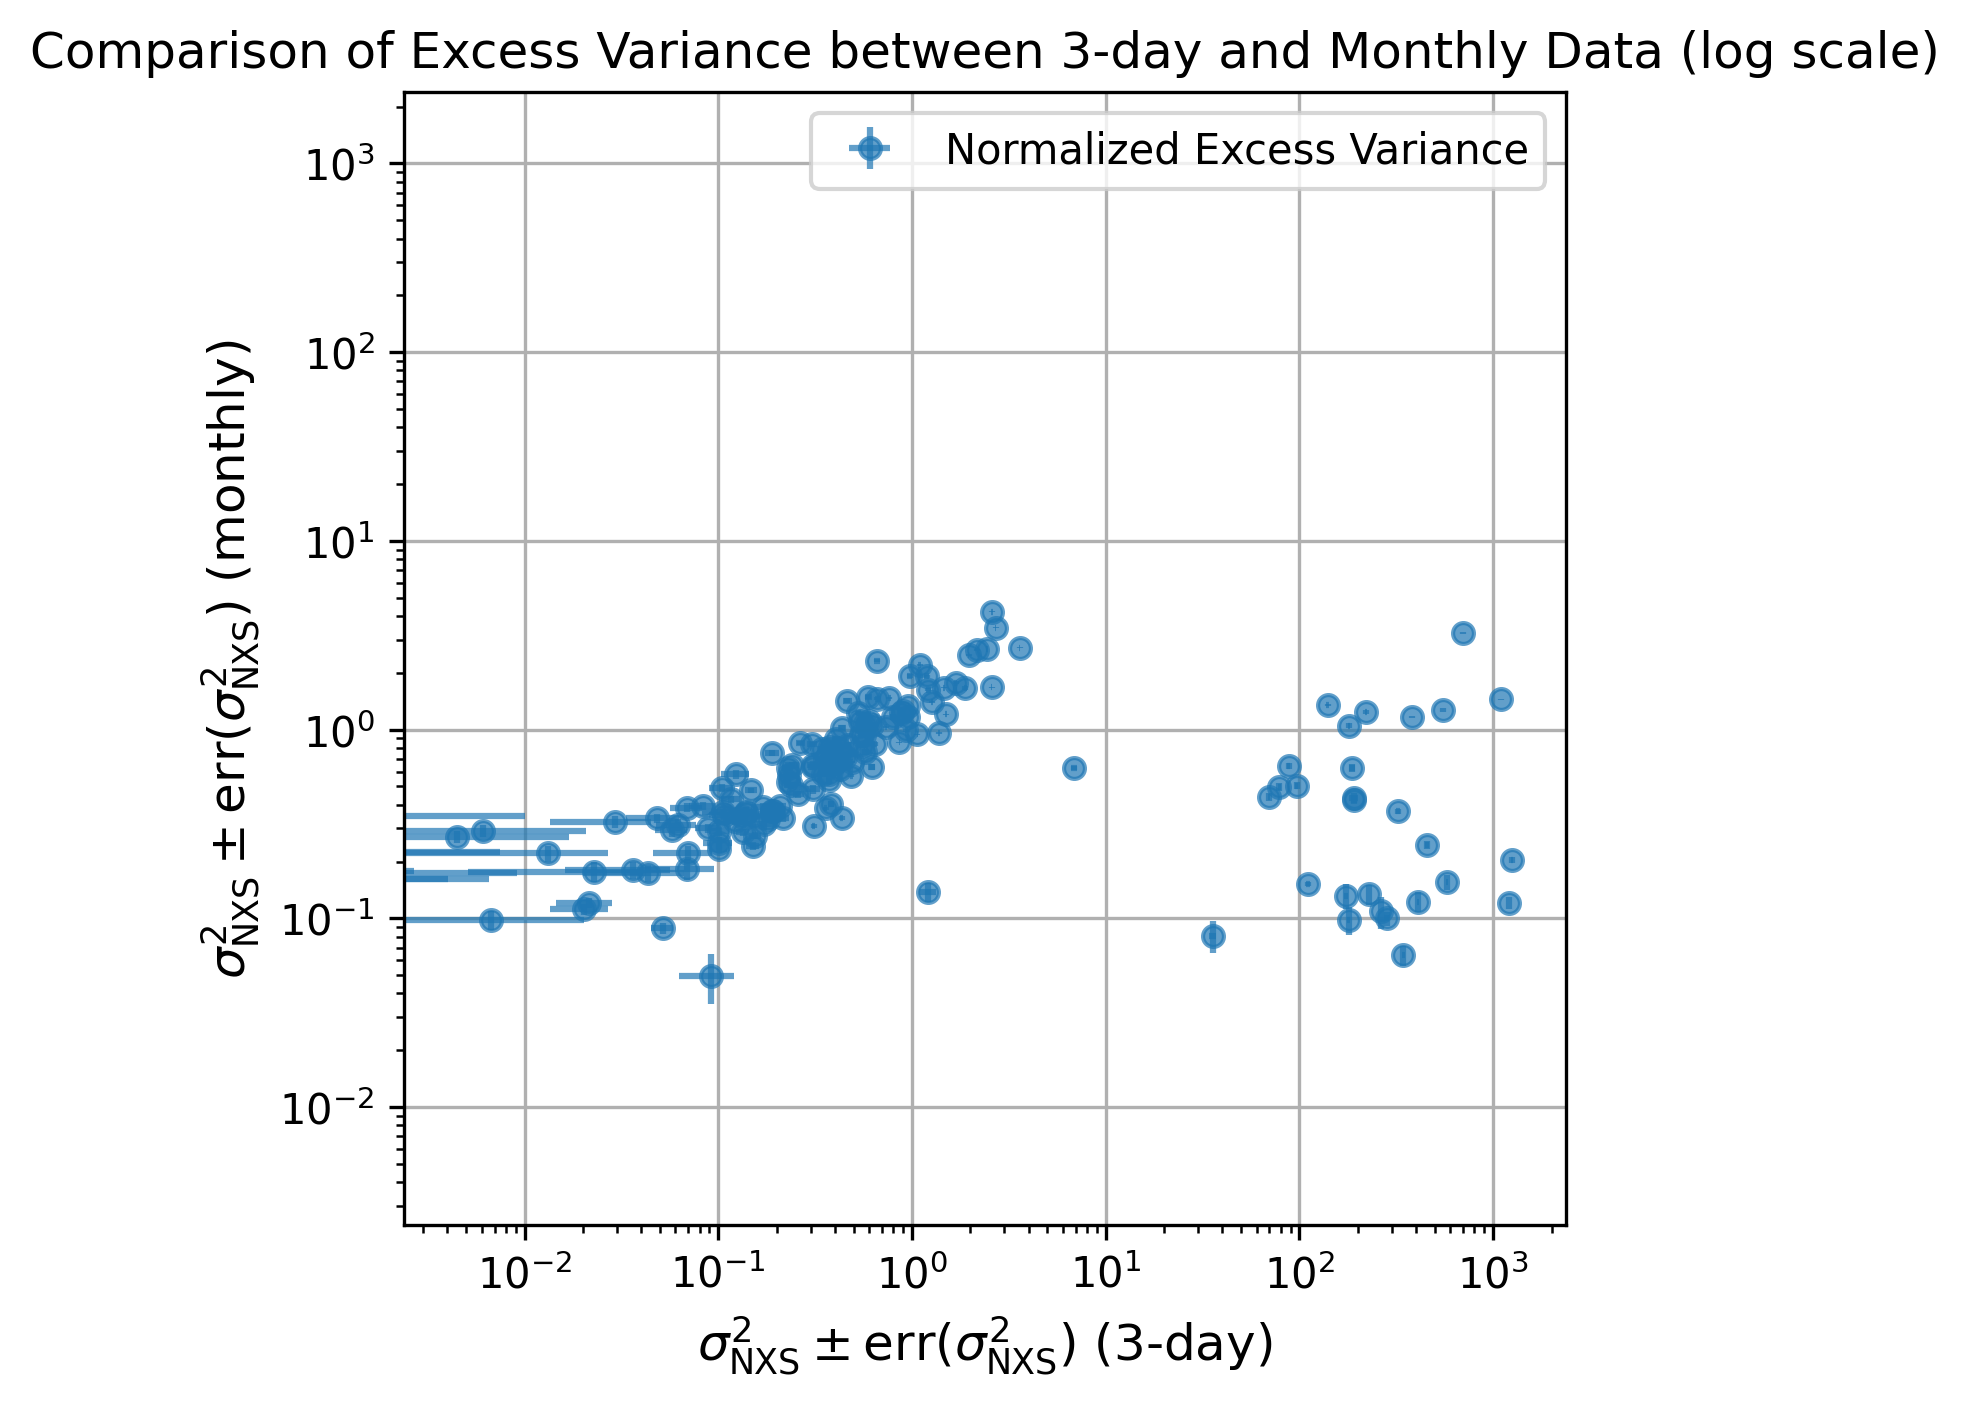

In [61]:
## plot V_NXS(3-day) +/- eV_NXS(3-day) versus V_NXS(month) +/- eV_NXS(month)

plt.figure(figsize=(5,5), dpi=300)

plt.errorbar(selected_table_3days['Norm_Excess_Variance_Estimated'], selected_table_monthly['Norm_Excess_Variance_Estimated'],
             xerr=selected_table_3days['Unc_Norm_Excess_Variance_Estimated'], yerr=selected_table_monthly['Unc_Norm_Excess_Variance_Estimated'],
             fmt='o', markersize=5, alpha=0.7, label='Normalized Excess Variance')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (3-day)', fontsize=12)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
plt.title('Comparison of Excess Variance between 3-day and Monthly Data (log scale)', fontsize=12)
plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.ylim(plt.xlim())

plt.grid(True)
plt.show()

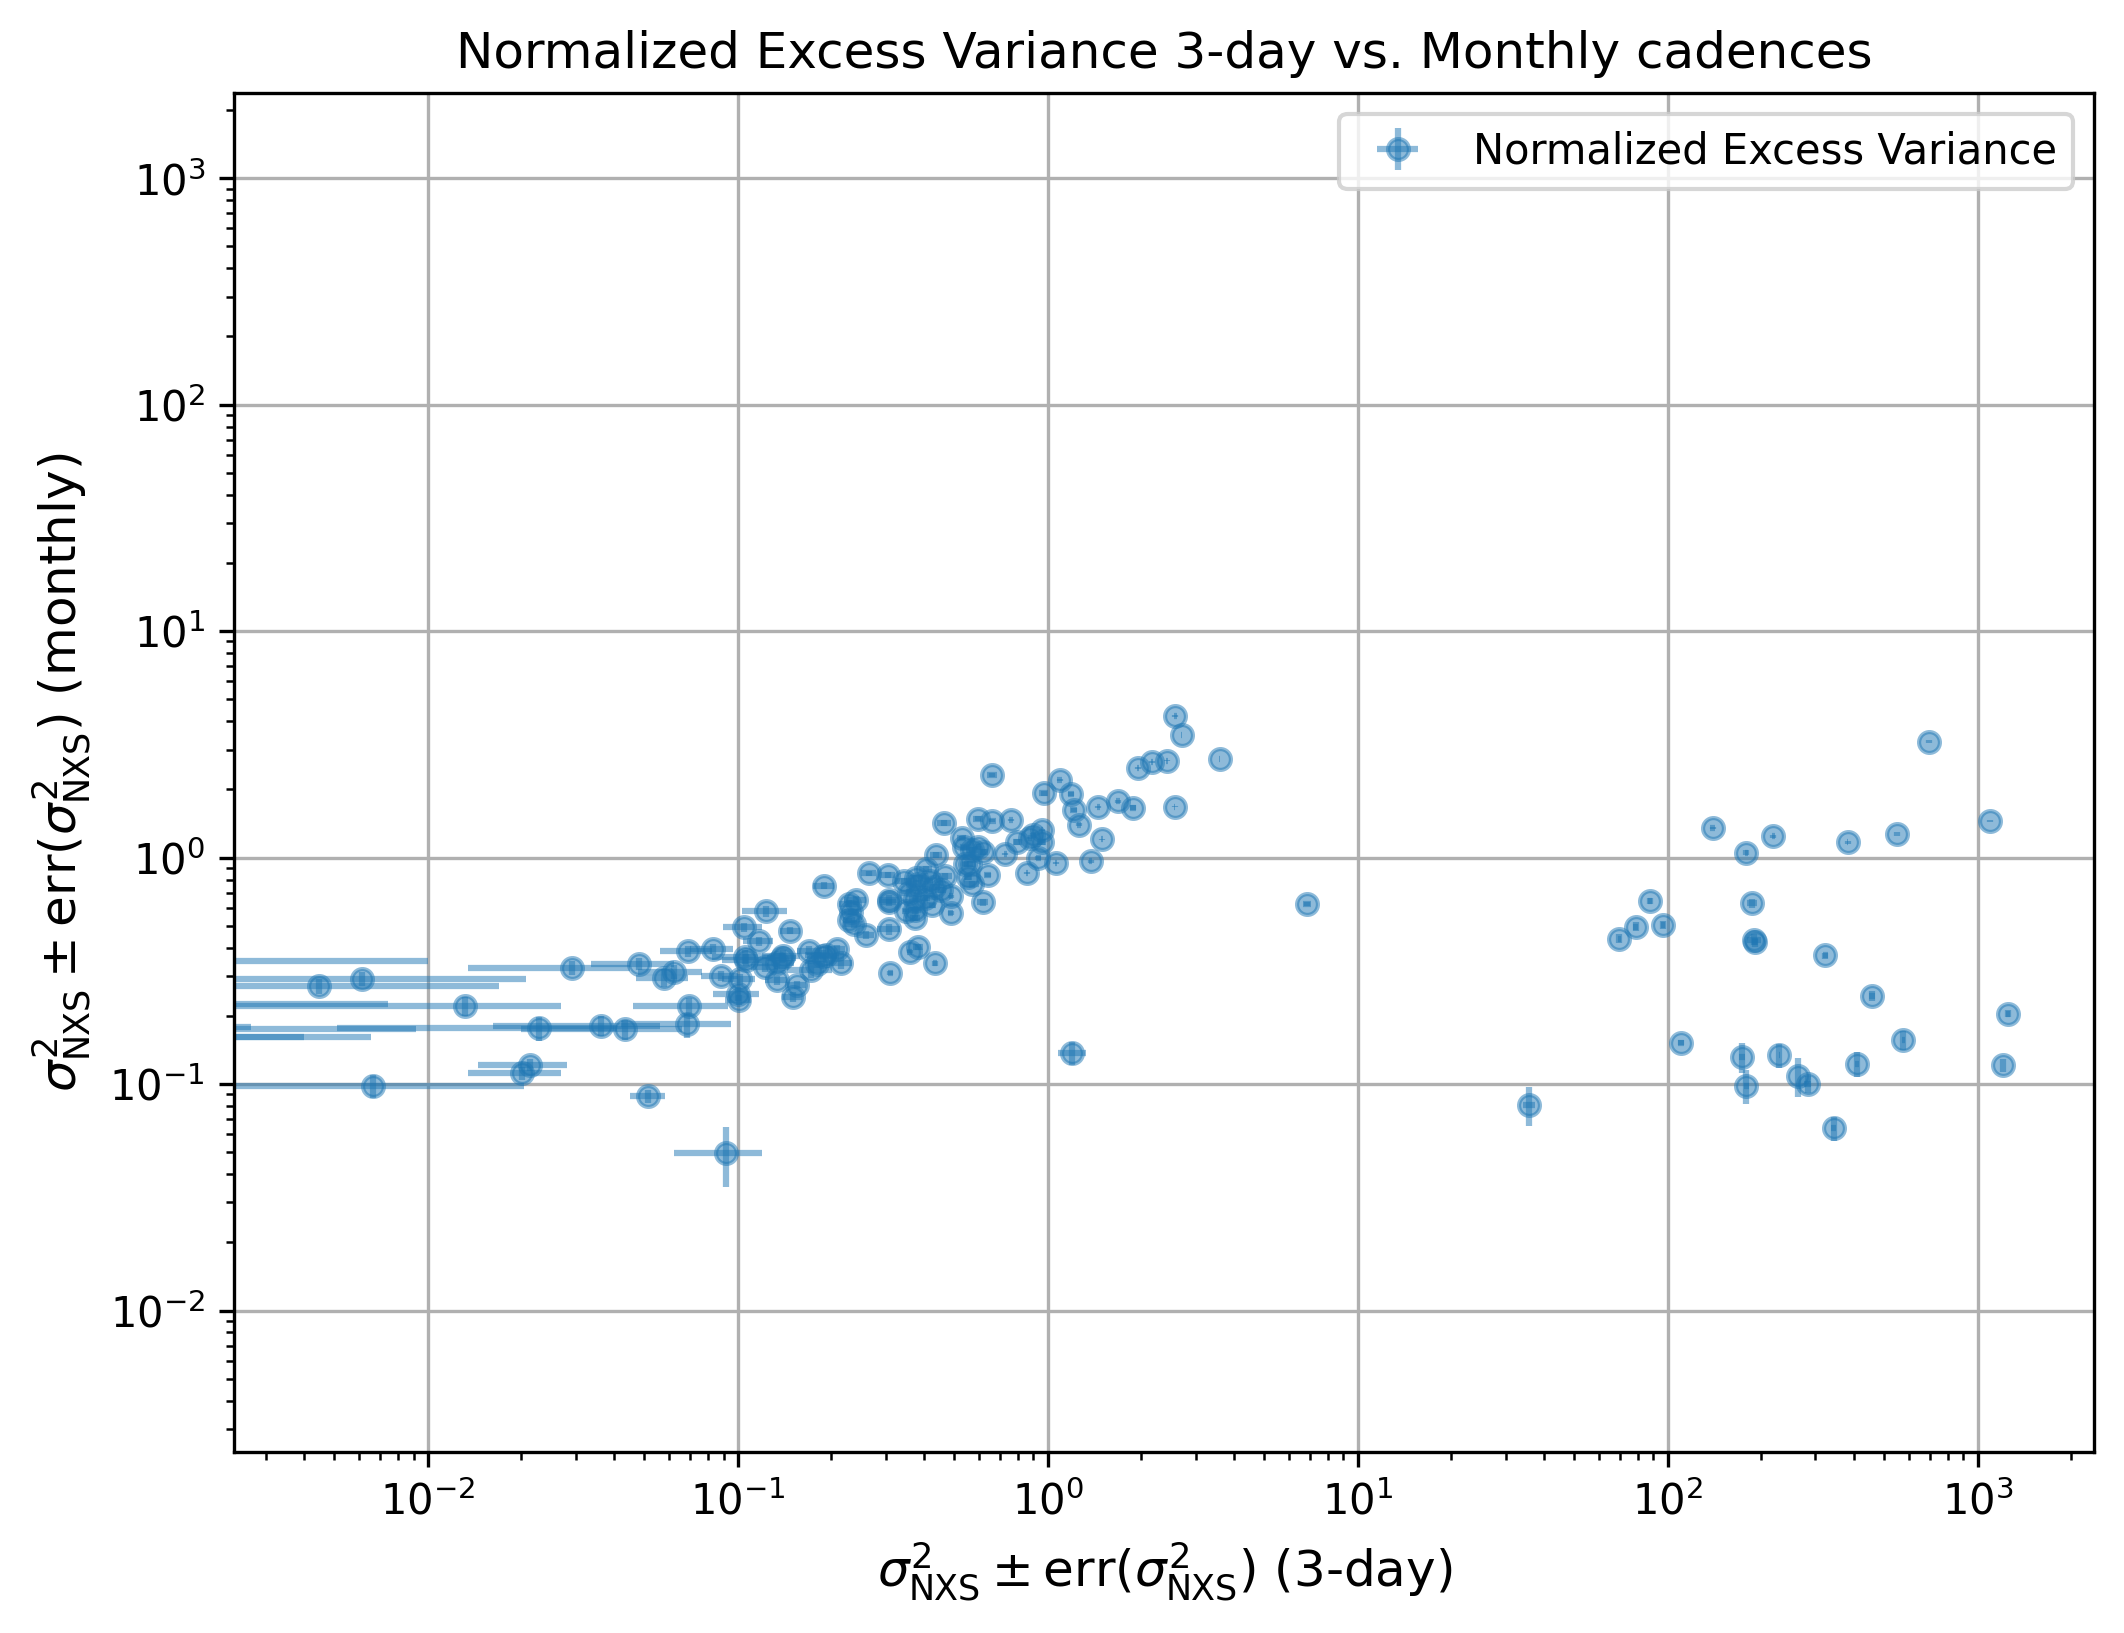

In [62]:
## plot V_NXS(3-day) +/- eV_NXS(3-day) versus V_NXS(month) +/- eV_NXS(month)

plt.figure(figsize=(8,6), dpi=300)

plt.errorbar(selected_table_3days['Norm_Excess_Variance_Estimated'], selected_table_monthly['Norm_Excess_Variance_Estimated'],
             xerr=selected_table_3days['Unc_Norm_Excess_Variance_Estimated'], yerr=selected_table_monthly['Unc_Norm_Excess_Variance_Estimated'],
             fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (3-day)', fontsize=12)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
plt.title('Normalized Excess Variance 3-day vs. Monthly cadences', fontsize=12)
plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.ylim(plt.xlim())

plt.grid(True)
plt.show()

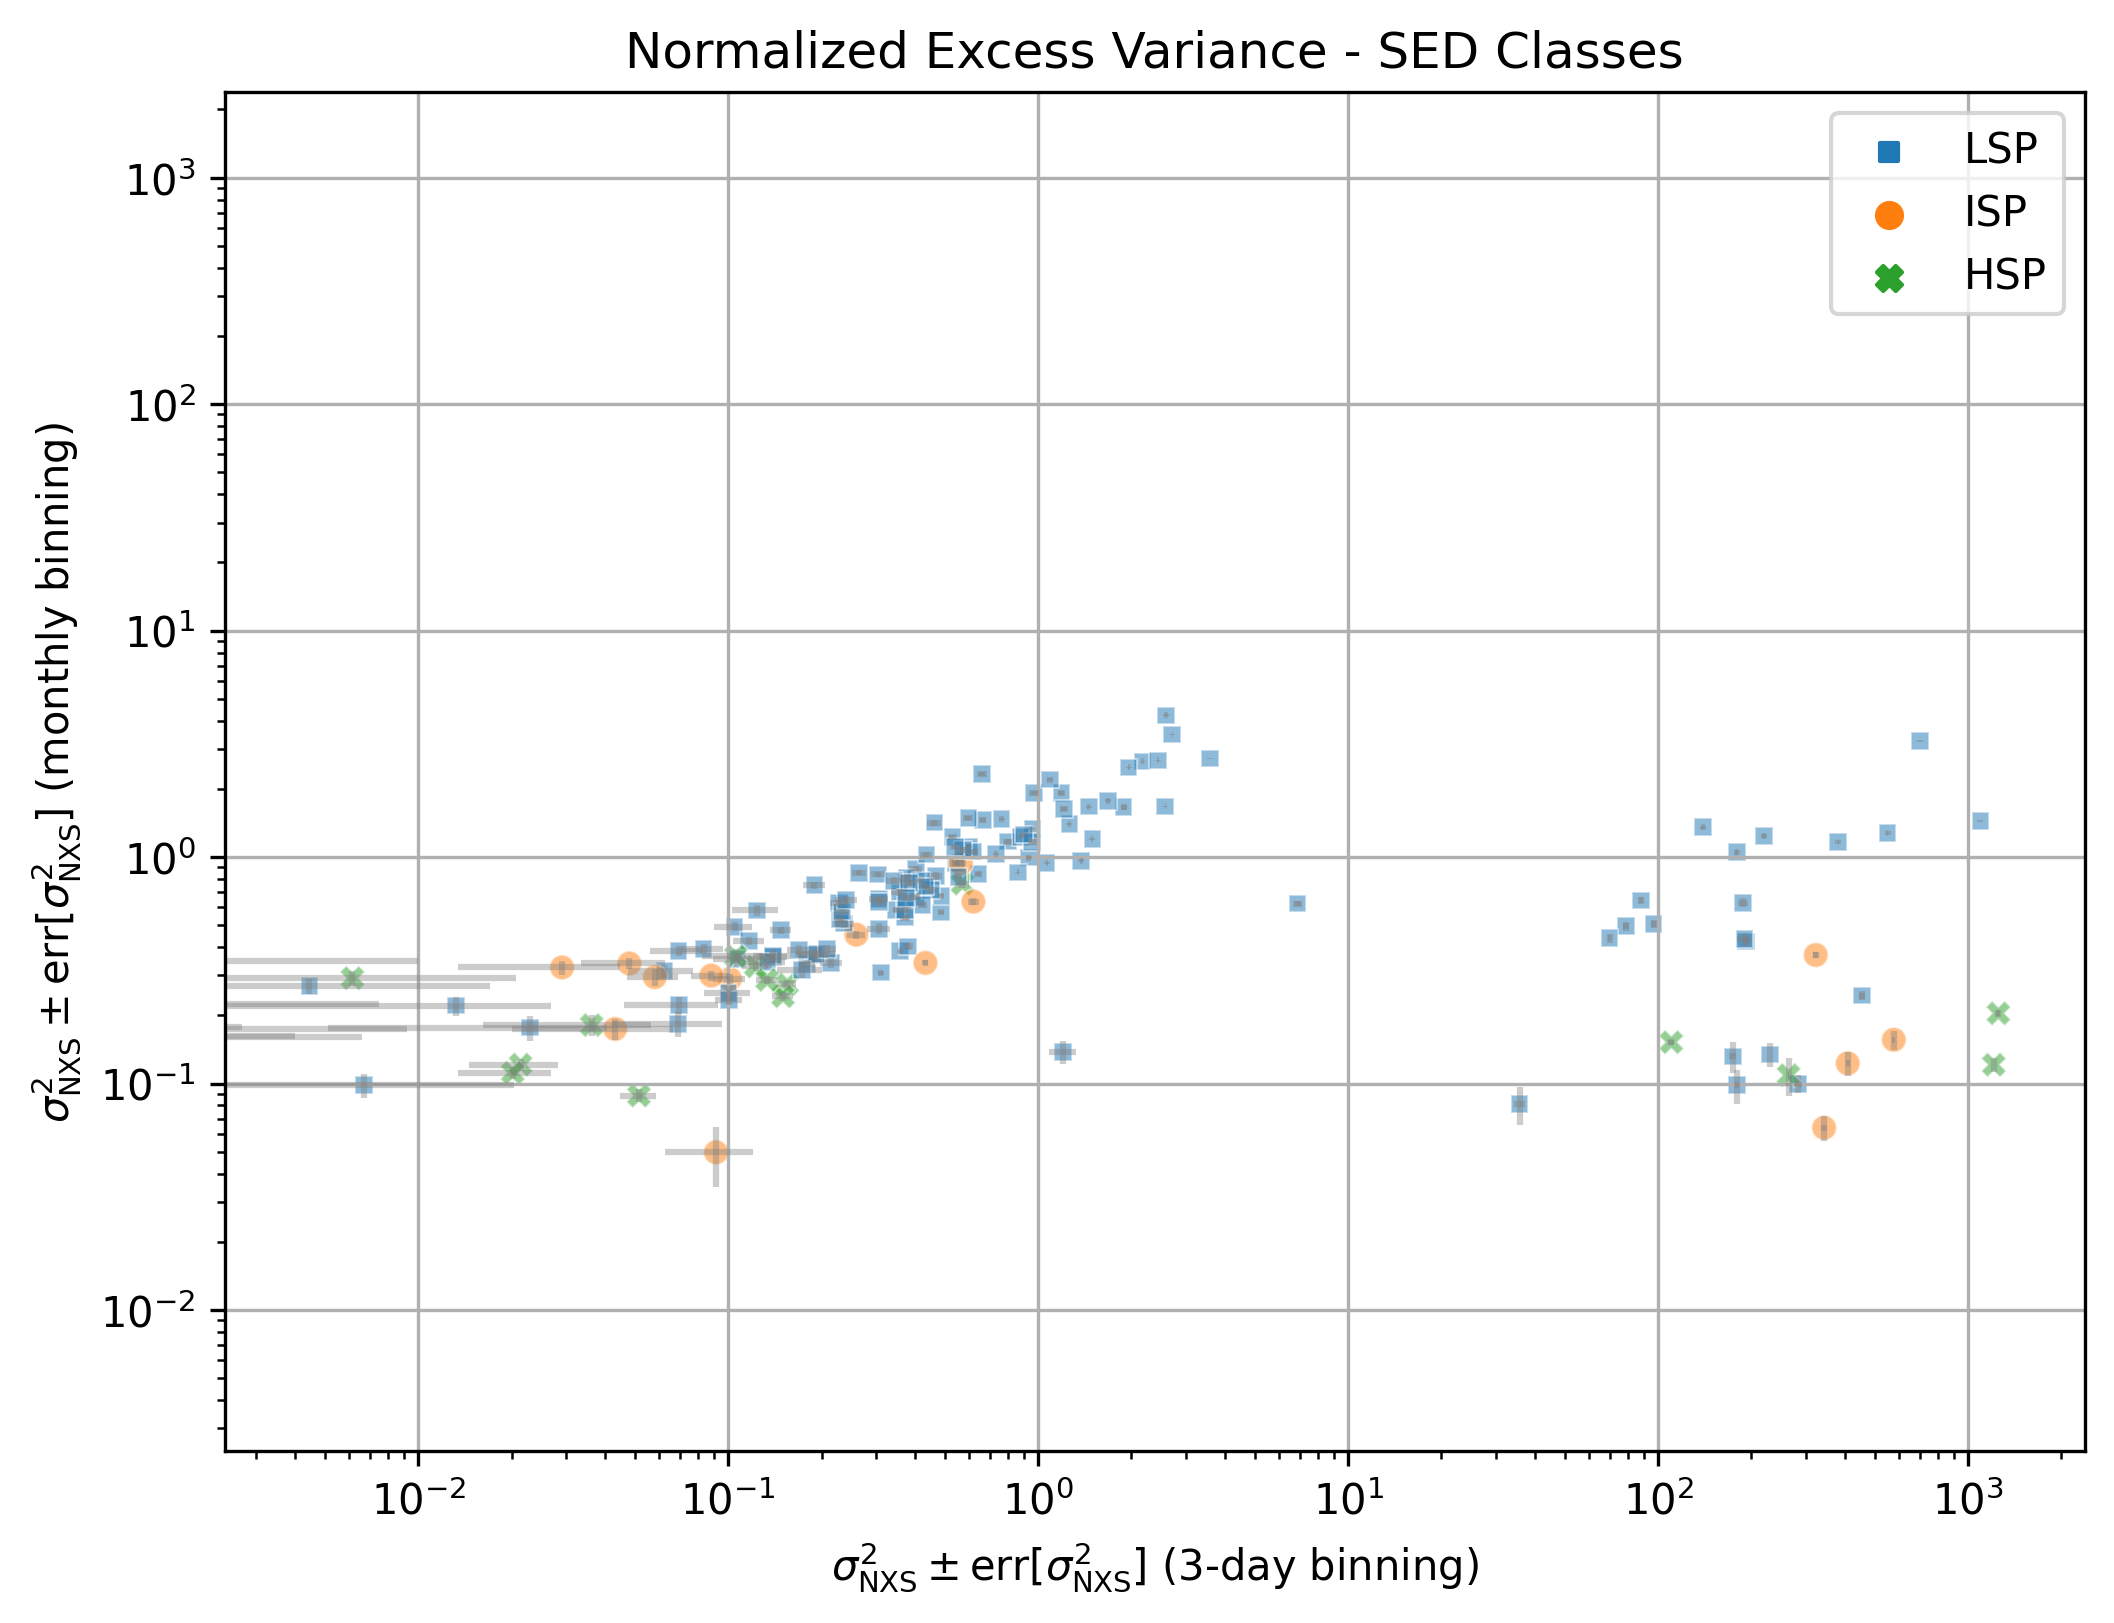

In [63]:
plt.figure(figsize=(8,6), dpi=300)


sns.scatterplot(x=selected_table_3days['Norm_Excess_Variance_Estimated'], 
                y=selected_table_monthly['Norm_Excess_Variance_Estimated'], 
                hue=selected_table_monthly['SED_class'], hue_order=['LSP','ISP','HSP'],
                style=selected_table_monthly['SED_class'], alpha=0.5)

plt.errorbar(selected_table_3days['Norm_Excess_Variance_Estimated'], 
             selected_table_monthly['Norm_Excess_Variance_Estimated'],
             xerr=selected_table_3days['Unc_Norm_Excess_Variance_Estimated'], 
             yerr=selected_table_monthly['Unc_Norm_Excess_Variance_Estimated'],
             fmt='none', ecolor='gray', alpha=0.4)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}[\sigma_{\mathrm{NXS}}^{2}]$ (3-day binning)', fontsize=10)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}[\sigma_{\mathrm{NXS}}^{2}]$ (monthly binning)', fontsize=10)
plt.title('Normalized Excess Variance - SED Classes', fontsize=12)
plt.legend()

plt.ylim(plt.xlim())

plt.grid(True)
plt.show()


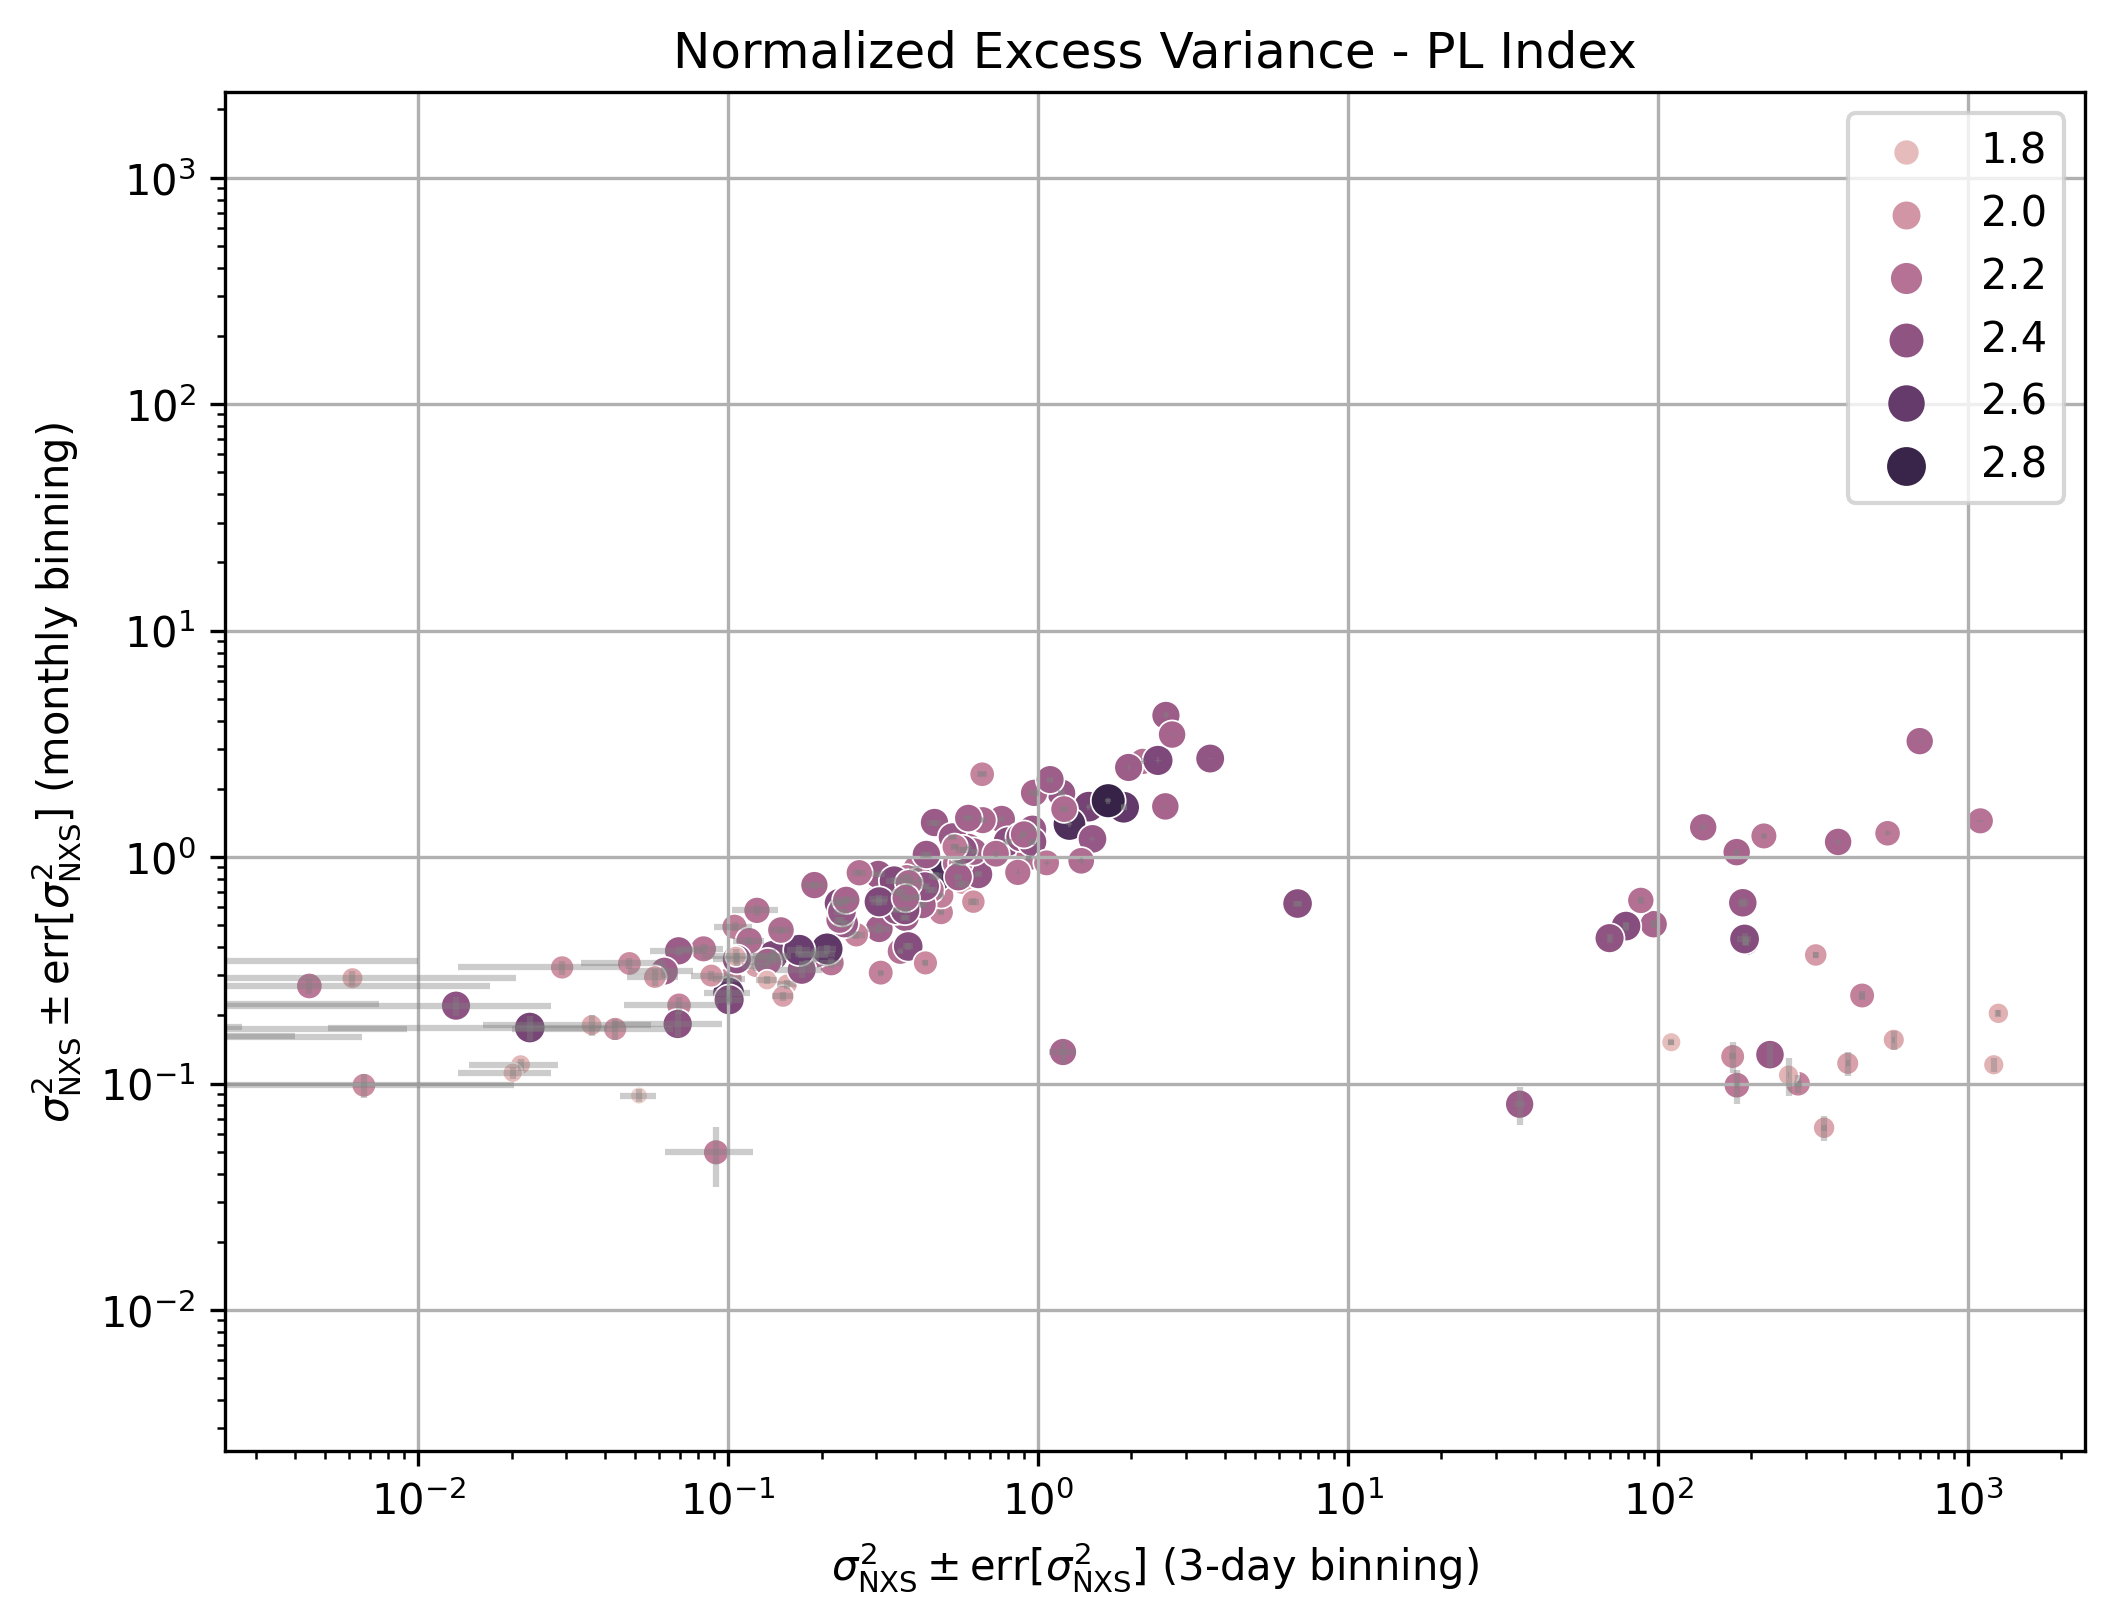

In [64]:
plt.figure(figsize=(8,6), dpi=300)


sns.scatterplot(x=selected_table_3days['Norm_Excess_Variance_Estimated'], 
                y=selected_table_monthly['Norm_Excess_Variance_Estimated'], 
                hue=selected_table_monthly['PL_Index'], size=selected_table_monthly['PL_Index'])

plt.errorbar(selected_table_3days['Norm_Excess_Variance_Estimated'], 
             selected_table_monthly['Norm_Excess_Variance_Estimated'],
             xerr=selected_table_3days['Unc_Norm_Excess_Variance_Estimated'], 
             yerr=selected_table_monthly['Unc_Norm_Excess_Variance_Estimated'],
             fmt='none', ecolor='gray', alpha=0.4)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}[\sigma_{\mathrm{NXS}}^{2}]$ (3-day binning)', fontsize=10)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}[\sigma_{\mathrm{NXS}}^{2}]$ (monthly binning)', fontsize=10)
plt.title('Normalized Excess Variance - PL Index', fontsize=12)
plt.legend()

plt.ylim(plt.xlim())

plt.grid(True)
plt.show()


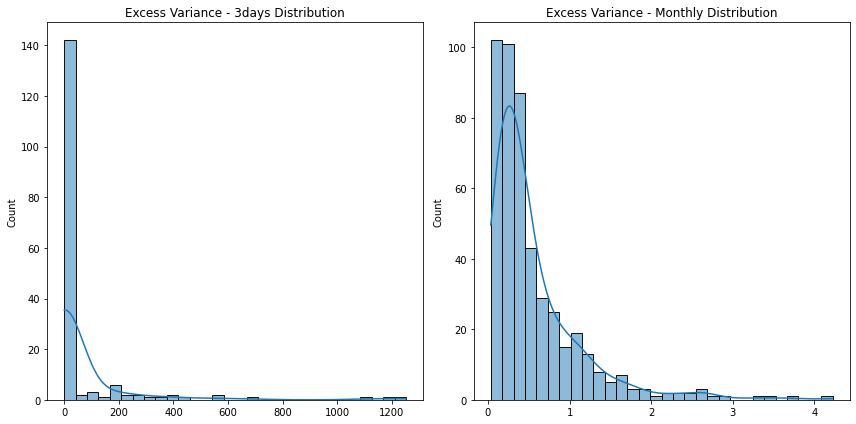

In [65]:
## show the distributions (histograms) of V_NXS(3-day) and V_NXS(month)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(selected_table_3days['Norm_Excess_Variance_Estimated'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Excess Variance - 3days Distribution')

sns.histplot(selected_table_monthly['Norm_Excess_Variance_Estimated'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Excess Variance - Monthly Distribution')

plt.tight_layout()
plt.show()

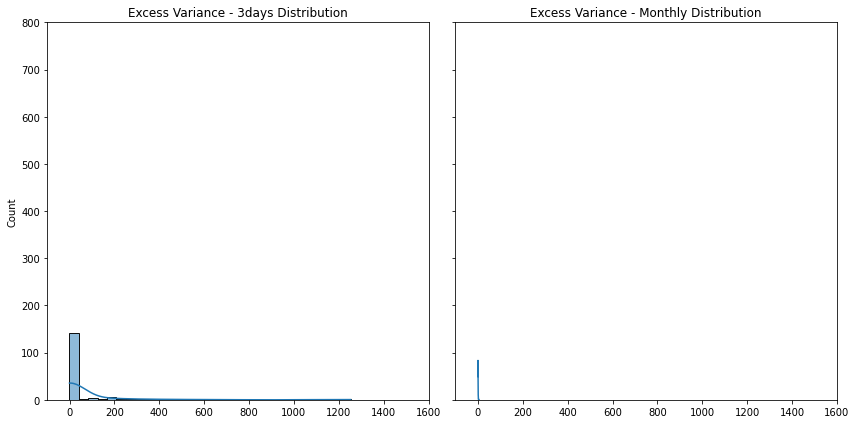

In [66]:
## x and y with same values

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(selected_table_3days['Norm_Excess_Variance_Estimated'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Excess Variance - 3days Distribution')
axes[0].set_xlim(-100, 1600)
axes[0].set_ylim(0, 800)

sns.histplot(selected_table_monthly['Norm_Excess_Variance_Estimated'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Excess Variance - Monthly Distribution')

plt.tight_layout()
plt.show()

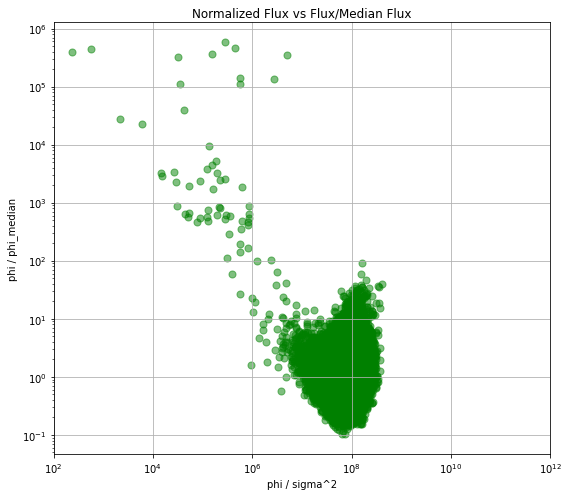

In [67]:
## 3-days

x_axis_all = []
y_axis_all = []


for file_name in filtered_3days_file_list:
    
    analyzer = JSONAnalyzer(file_name,'3-days','fixed')

    source_dictionary = analyzer.data_dict
    source_df = analyzer.create_dataframe()

    filtered_df = analyzer.removing_outliers()
    
    ## select only non-NaN values from the DataFrame for flux and flux_error
    flux_non_nan_values = filtered_df.dropna(subset=['flux'])
    flux_error_non_nan_values = filtered_df.dropna(subset=['flux_error'])

    ## get the indexes (time) of the non-NaN values
    time_flux_non_nan = flux_non_nan_values.index
    time_flux_error_non_nan = flux_error_non_nan_values.index

    ## selected flux points
    selected_flux_values = flux_non_nan_values['flux']
    selected_flux_error_values = flux_error_non_nan_values['flux_error']

    x_axis = selected_flux_values / (selected_flux_error_values**2)
    y_axis = selected_flux_values / np.median(selected_flux_values)
    
    ## append
    x_axis_all.extend(x_axis)
    y_axis_all.extend(y_axis)

    
## Plot
plt.figure(figsize=(8, 7))
plt.scatter(x_axis_all, y_axis_all, alpha=0.5, s=50, color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2,1e12)
plt.xlabel('phi / sigma^2')
plt.ylabel('phi / phi_median')
plt.title('Normalized Flux vs Flux/Median Flux')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
## 3-days -- flux_error / flux vs. ts

x_axis_all3 = []
y_axis_all3 = []


for file_name in filtered_3days_file_list:
    
    analyzer = JSONAnalyzer(file_name,'3-days','fixed')

    source_dictionary = analyzer.data_dict
    source_df = analyzer.create_dataframe()

    filtered_df = analyzer.removing_outliers()
#     filtered_df = source_df

    ## reset index
    filtered_df.reset_index(inplace=True)
    
    ## select only non-NaN values from the DataFrame for flux and flux_error
    non_nan_values = filtered_df.dropna(subset=['flux'])
    
#     print(filtered_df)


    ## get the indexes (time) of the non-NaN values
    time_fit_non_nan = non_nan_values['time_fit_convergence'].values

    ## selected flux points
    selected_flux_values = non_nan_values['flux'].values
    selected_flux_error_values = non_nan_values['flux_error'].values
    selected_ts_values = non_nan_values['values_ts'].values
    
#     print(selected_ts_values)

    x_axis = selected_ts_values
    y_axis = selected_flux_error_values / selected_flux_values
#     x_axis = selected_flux_values / selected_flux_error_values
    
    ## append
    x_axis_all3.extend(x_axis)
    y_axis_all3.extend(y_axis)


In [69]:
x_axis_all3_array = np.array(x_axis_all3)
y_axis_all3_array = np.array(y_axis_all3)

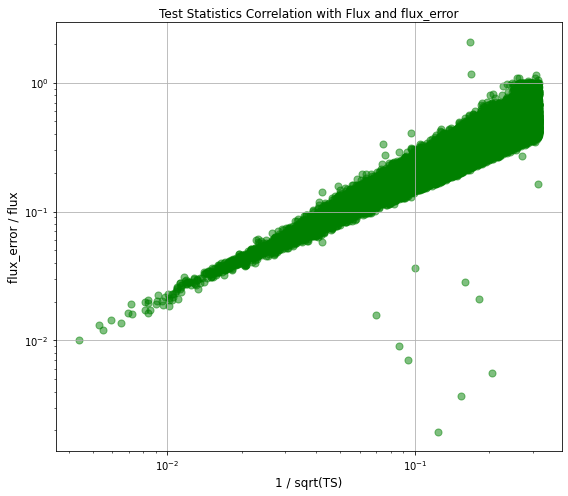

In [70]:
## Plot TS

plt.figure(figsize=(8, 7))
plt.scatter(1/np.sqrt(x_axis_all3_array), y_axis_all3_array, alpha=0.5, s=50, color='green')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('1 / sqrt(TS)', fontsize=12)
plt.ylabel('flux_error / flux', fontsize=12)
plt.title('Test Statistics Correlation with Flux and flux_error', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
# # Define a filtering condition
# def filtering_condition(data):
#     # Example: Filter data where the value of a specific key is greater than a threshold
#     threshold = 5
#     return len(data) > threshold

# # Filter data based on the condition
# filtered_data = analyzer.filter_data(filtering_condition)

# # Plot and save analysis plots
# save_folder = "analysis_plots"
# analyzer.plot_analysis(filtered_data, save_folder)

In [77]:
names = selected_table_monthly['Source_Name']

v_nxs_3days = selected_table_3days['Norm_Excess_Variance_Estimated']
unc_v_nxs_3days = selected_table_3days['Unc_Norm_Excess_Variance_Estimated']

v_nxs_monthly = selected_table_monthly['Norm_Excess_Variance_Estimated']
unc_v_nxs_monthly = selected_table_monthly['Unc_Norm_Excess_Variance_Estimated']

classes = selected_table_monthly['CLASS']
classes_SED = selected_table_monthly['SED_class']

In [78]:
def get_flux(source_name):
    
    analyzer = JSONAnalyzer(f'4FGL+{source_name}.json','3-days','fixed')

    source_dictionary = analyzer.data_dict
    source_df = analyzer.create_dataframe()

    filtered_df = analyzer.removing_outliers()
#     filtered_df = source_df

    ## reset index
    filtered_df.reset_index(inplace=True)
    
    ## select only non-NaN values from the DataFrame for flux and flux_error
    non_nan_values = filtered_df.dropna(subset=['flux'])
    
#     print(filtered_df)


    ## get the indexes (time) of the non-NaN values
    time_fit_non_nan = non_nan_values['time_fit_convergence'].values

    ## selected flux points
    selected_flux_values = non_nan_values['flux'].values
    selected_flux_error_values = non_nan_values['flux_error'].values
    selected_ts_values = non_nan_values['values_ts'].values
    
    ## spectrum flux (?)
    index = df_agn_pop_4lac_dr3[df_agn_pop_4lac_dr3['Source_Name'] == source_name].index[0]
    spectrum_flux = df_agn_pop_4lac_dr3.loc[index, 'Spectrum_Flux_Estimated']
    
    return time_fit_non_nan, selected_flux_values, spectrum_flux

In [82]:
%matplotlib qt

###### UNCOMMENT THE LINE ABOVE FOR AN INTERACTIVE PLOT


import mplcursors


fig, axs = plt.subplots(2, 1)

# fig, axs = plt.subplots(2, 1, figsize=(15, 10), dpi=300)

# Main plot
axs[0].scatter(v_nxs_3days, v_nxs_monthly, label='Normalized Excess Variance')
axs[0].errorbar(v_nxs_3days, v_nxs_monthly, xerr = unc_v_nxs_3days, yerr = unc_v_nxs_monthly, ls='none', ecolor = 'black', alpha = 0.1)

axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].set_xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}[\sigma_{\mathrm{NXS}}^{2}]$ (3-day binning)', fontsize=7)
axs[0].set_ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}[\sigma_{\mathrm{NXS}}^{2}]$ (monthly binning)', fontsize=7)

axs[0].grid()
axs[0].legend()

x_ticks = np.logspace(-3, 3, num=20, base=10)
x_tick_labels = [f'{tick:.1e}' for tick in x_ticks]
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_tick_labels)

# Create a cursor for annotations
cursor = mplcursors.cursor(hover=True)

# cursor.connect("add", lambda sel: sel.annotation.draggable(True))
cursor.connect("add", lambda sel: sel.annotation.set_backgroundcolor('pink'))

# Format the annotation displayed when hovering over a point
@cursor.connect("add")
def on_hover(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    source_name = names[index]
    source_class = classes[index]
    source_SED_class = classes_SED[index]
    sel.annotation.set_text(f"Source: {source_name}\nV_NXS (3days): {x:.2f}\nV_NXS (monthly): {y:.2f}\n\nClass: {source_class}\nSED Class: {source_SED_class}")
    
#     sel.annotation.set_alpha(1.0) # no transparency
    
    # Clear the LC subplot
    axs[1].cla()
    
    time_flux_non_nan, selected_flux_values, spectrum_flux = get_flux(source_name)
    
    # ## Converting time from MET to UTC
    # time_UTC = convert_MET_UTC(data_dict['time'])
    # time_error_UTC = convert_MET_UTC(data_dict['time_error'])
    # time_upper_lim_UTC = convert_MET_UTC(data_dict['time_upper_lim'])

    ## Flux
    axs[1].plot(time_flux_non_nan, selected_flux_values, '.', markersize=10, label='Flux Points')
    axs[1].plot(time_flux_non_nan, selected_flux_values, linewidth=0.4, color='black')
    
    ## spectrum_flux
    # axs[1].hlines(y=np.average(selected_flux_values), xmin=np.min(time), xmax=np.max(time), linewidth=3, linestyles='-.', color='blue', label='Average LC Flux Points')
    # axs[1].hlines(y=spectrum_flux, xmin=np.min(time), xmax=np.max(time), linewidth=3, linestyles='--', color='red', label='Flux from Spectrum')
    
    
    ## Upper Limits
    # axs[1].plot(time_upper_lim_UTC, data_dict['flux_upper_lim'], 'v', color='gray', markersize=3, alpha=0.45, label='Upper Limits')

    ## Error_bar
    # axs[1].errorbar(time_UTC, data_dict['flux'], yerr=data_dict['flux_high_error']-data_dict['flux'], linewidth=0.2, color='black', alpha=0.9)
    # axs[1].errorbar(time_UTC, data_dict['flux'], yerr=data_dict['flux']-data_dict['flux_low_error'], linewidth=0.2, color='black', alpha=0.9)
    
    axs[1].set_title(f'Lightcurve for {source_name}', fontsize=7)
    axs[1].set_xlabel('Time (MET)')
    axs[1].set_ylabel('Flux (0.1-100 GeV ph $cm^{-2}$ $s^{-1}$)')
    
    axs[1].set_ylim(0, np.max(selected_flux_values))
    
plt.show()

/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(
/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(
/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(
/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(
/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.i

In [83]:
%matplotlib inline